In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(879).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(1073).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(1061).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(812).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(1273).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(258).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(594).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(254).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(682).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(518).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(1049).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(866).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(532)

/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(2580).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(3369).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(739).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(2910).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(1358).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(3280).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(843).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(632).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(647).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(2527).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(4129).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(44).jp

/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(3636).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(2976).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(1885).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(3221).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(4075).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(100).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(3490).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(115).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(452).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(3804).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(857).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(2746).

/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1146).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(324).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(471).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1070).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(723).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(154).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(440).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1190).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(689).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(702).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(290).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(953).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(665).jpg
/kaggle/i

In [4]:
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image
import cv2

In [5]:
data_path = '/kaggle/input/chest-xray-covid19-pneumonia/Data'

In [6]:
baseModel1 = VGG16(input_shape=(300,300,3), weights='imagenet', include_top=False)
baseModel2 = tf.keras.applications.Xception(input_shape=(300,300,3), weights='imagenet', include_top=False)
baseModel3 = tf.keras.applications.InceptionV3(input_shape=(300,300,3), weights='imagenet', include_top=False)
basemodels = [baseModel1,baseModel2,baseModel3]
for i in range(4):
    for layer in basemodels[i].layers:
        layer.trainable = False

51879936/51877672 [==============================] - 1s 0us/step


In [7]:
x = basemodels[0].output
x = AveragePooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)

model1 = Model(basemodels[0].input,x)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
x = basemodels[1].output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

model2 = Model(basemodels[1].input,x)
model2.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
x = basemodels[2].output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)

model3 = Model(basemodels[2].input,x)
model3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   samplewise_center=True,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_path + '/train',
                                                 target_size = (300,300),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(data_path + '/test',
                                            target_size = (300,300),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint, EarlyStopping
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [10]:
epochs = 30
filepath="VGG16_weights.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_acc', mode="max", patience=10)
history1 = model1.fit(training_set,validation_data=test_set,callbacks=[lr_reduce,checkpoint1,early] ,
         epochs=epochs)

Epoch 1/30
322/322 [==============================] - 211s 656ms/step - loss: 0.4416 - accuracy: 0.8233 - val_loss: 0.3641 - val_accuracy: 0.8323 - lr: 1.0000e-04
Epoch 2/30
322/322 [==============================] - 193s 599ms/step - loss: 0.2778 - accuracy: 0.8976 - val_loss: 0.2384 - val_accuracy: 0.9037 - lr: 1.0000e-04
Epoch 3/30
322/322 [==============================] - 191s 593ms/step - loss: 0.2367 - accuracy: 0.9176 - val_loss: 0.2003 - val_accuracy: 0.9255 - lr: 1.0000e-04
Epoch 4/30
322/322 [==============================] - 186s 577ms/step - loss: 0.2073 - accuracy: 0.9248 - val_loss: 0.1973 - val_accuracy: 0.9309 - lr: 1.0000e-04
Epoch 5/30
322/322 [==============================] - 185s 575ms/step - loss: 0.2015 - accuracy: 0.9271 - val_loss: 0.3037 - val_accuracy: 0.8766 - lr: 1.0000e-04
Epoch 6/30
322/322 [==============================] - 186s 577ms/step - loss: 0.1852 - accuracy: 0.9351 - val_loss: 0.3266 - val_accuracy: 0.8641 - lr: 1.0000e-04
Epoch 7/30
322/322 [==

In [30]:
epochs = 50
history2 = model2.fit(training_set, validation_data=test_set, callbacks=[lr_reduce], epochs=epochs)

Epoch 1/50
100/100 [==============================] - 72s 721ms/step - loss: 6.3997 - accuracy: 0.7237 - val_loss: 0.5189 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 72s 721ms/step - loss: 0.7155 - accuracy: 0.7688 - val_loss: 0.5852 - val_accuracy: 0.7477 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 71s 713ms/step - loss: 0.5176 - accuracy: 0.8235 - val_loss: 0.4784 - val_accuracy: 0.8214 - lr: 0.0010
Epoch 4/50
 18/100 [====>.........................] - ETA: 42s - loss: 0.5381 - accuracy: 0.8229

KeyboardInterrupt: 

In [31]:
epochs = 30
filepath="InceptionV3_weights.h5"
checkpoint3 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', mode="max", patience=10)
history1 = model1.fit(training_set,validation_data=test_set,callbacks=[lr_reduce,checkpoint3,early] ,
         epochs=epochs)

Epoch 1/30
322/322 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9537
Epoch 00001: val_accuracy improved from -inf to 0.89829, saving model to InceptionV3_weights.h5
322/322 [==============================] - 192s 596ms/step - loss: 0.1183 - accuracy: 0.9537 - val_loss: 0.2437 - val_accuracy: 0.8983 - lr: 1.0000e-04
Epoch 2/30
322/322 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9528
Epoch 00002: val_accuracy did not improve from 0.89829
322/322 [==============================] - 190s 589ms/step - loss: 0.1261 - accuracy: 0.9528 - val_loss: 0.2678 - val_accuracy: 0.8929 - lr: 1.0000e-04
Epoch 3/30
322/322 [==============================] - ETA: 0s - loss: 0.1277 - accuracy: 0.9528
Epoch 00003: val_accuracy improved from 0.89829 to 0.90683, saving model to InceptionV3_weights.h5
322/322 [==============================] - 191s 594ms/step - loss: 0.1277 - accuracy: 0.9528 - val_loss: 0.2340 - val_accuracy: 0.9068 - lr: 1.0000e-04
Epoch 

Epoch 27/30
322/322 [==============================] - ETA: 0s - loss: 0.1072 - accuracy: 0.9601
Epoch 00027: val_accuracy did not improve from 0.95419
322/322 [==============================] - 187s 581ms/step - loss: 0.1072 - accuracy: 0.9601 - val_loss: 0.2039 - val_accuracy: 0.9154 - lr: 1.0000e-04
Epoch 28/30
322/322 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9596
Epoch 00028: val_accuracy did not improve from 0.95419
322/322 [==============================] - 188s 585ms/step - loss: 0.1056 - accuracy: 0.9596 - val_loss: 0.2337 - val_accuracy: 0.9115 - lr: 1.0000e-04
Epoch 29/30
322/322 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9633
Epoch 00029: val_accuracy did not improve from 0.95419
322/322 [==============================] - 191s 593ms/step - loss: 0.0992 - accuracy: 0.9633 - val_loss: 0.2988 - val_accuracy: 0.8804 - lr: 1.0000e-04
Epoch 30/30
322/322 [==============================] - ETA: 0s - loss: 0.0984 - accuracy

In [32]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs=range(len(acc))

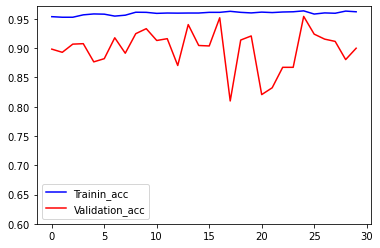

In [33]:
f, ax = plt.subplots(1)
ax.plot(epochs,acc,label='Trainin_acc',color='blue')
ax.plot(epochs,val_acc,label='Validation_acc',color='red')
ax.legend()
ax.set_ylim(ymin=0.5)
plt.savefig('InceptionV2_accuracy.png')

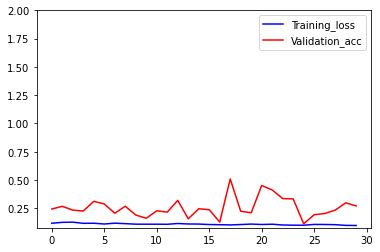

In [35]:

f, ax = plt.subplots(1)
ax.plot(epochs,loss,label='Training_loss',color='blue')
ax.plot(epochs,val_loss,label='Validation_acc',color='red')
ax.legend()
ax.set_ylim(ymax=2)
plt.savefig('Inceptionv3_loss.png')